In [1]:
import os
import csv
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('normalized_medical_expensess.db')
cursor = conn.cursor()

# Create tables
cursor.execute('''CREATE TABLE IF NOT EXISTS numerical_data (
                    id INTEGER PRIMARY KEY,
                    age INTEGER,
                    bmi REAL,
                    children INTEGER,
                    charges REAL
                )''')

cursor.execute('''CREATE TABLE IF NOT EXISTS categorical_data (
                    id INTEGER PRIMARY KEY,
                    sex TEXT,
                    smoker TEXT,
                    region TEXT
                )''')

# Read data from CSV and insert into tables
with open('medical insurance expensess-Copy1.csv', newline='') as file:
    reader = csv.DictReader(file)
    for row in reader:
        # Insert into numerical_data table
        numerical_data = (row['age'], row['bmi'], row['children'], row['charges'])
        cursor.execute('''INSERT INTO numerical_data (age, bmi, children, charges) VALUES (?, ?, ?, ?)''', numerical_data)
        numerical_id = cursor.lastrowid
        
        # Insert into categorical_data table
        categorical_data = (row['sex'], row['smoker'], row['region'])
        cursor.execute('''INSERT INTO categorical_data (sex, smoker, region) VALUES (?, ?, ?)''', categorical_data)
        categorical_id = cursor.lastrowid
        
        # Update numerical_data table with categorical_id
        cursor.execute('''UPDATE numerical_data SET id = ? WHERE rowid = ?''', (categorical_id, numerical_id))

# Commit changes and close connection
conn.commit()
conn.close()

In [2]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('normalized_medical_expensess.db')
cursor = conn.cursor()

# Retrieve and print numerical data
print("Numerical Data:")
cursor.execute('''SELECT * FROM numerical_data''')
numerical_data = cursor.fetchall()
for row in numerical_data:
    print(row)

# Retrieve and print categorical data
print("\nCategorical Data:")
cursor.execute('''SELECT * FROM categorical_data''')
categorical_data = cursor.fetchall()
for row in categorical_data:
    print(row)

# Close connection
conn.close()


Numerical Data:
(1, 19, 27.9, 0, 16884.924)
(2, 18, 33.77, 1, 1725.5523)
(3, 28, 33.0, 3, 4449.462)
(4, 33, 22.705, 0, 21984.47061)
(5, 32, 28.88, 0, 3866.8552)
(6, 31, 25.74, 0, 3756.6216)
(7, 46, 33.44, 1, 8240.5896)
(8, 37, 27.74, 3, 7281.5056)
(9, 37, 29.83, 2, 6406.4107)
(10, 60, 25.84, 0, 28923.13692)
(11, 25, 26.22, 0, 2721.3208)
(12, 62, 26.29, 0, 27808.7251)
(13, 23, 34.4, 0, 1826.843)
(14, 56, 39.82, 0, 11090.7178)
(15, 27, 42.13, 'None', 39611.7577)
(16, 19, 24.6, 1, 1837.237)
(17, 52, 30.78, 1, 10797.3362)
(18, 23, 23.845, 0, 2395.17155)
(19, 56, 40.3, 0, 10602.385)
(20, 30, 'None', 0, 36837.467)
(21, 60, 36.005, 0, 13228.84695)
(22, 30, 32.4, 1, 4149.736)
(23, 18, 34.1, 0, 1137.011)
(24, 34, 31.92, 1, 37701.8768)
(25, 37, 28.025, 2, 6203.90175)
(26, 59, 27.72, 3, 14001.1338)
(27, 63, 23.085, 0, 14451.83515)
(28, 55, 32.775, 2, 12268.63225)
(29, 23, 17.385, 1, 2775.19215)
(30, 31, 36.3, 2, 38711.0)
(31, 22, 35.6, 0, 35585.576)
(32, 18, 26.315, 0, 2198.18985)
(33, 19, 28.6, 

In [3]:
import pandas as pd
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('normalized_medical_expensess.db')

# SQL query with JOIN
query = """ SELECT numerical_data.id,numerical_data.age,numerical_data.bmi,numerical_data.children,
                   categorical_data.sex,categorical_data.region,categorical_data.smoker,numerical_data.charges
            FROM numerical_data
            JOIN categorical_data ON categorical_data.id = numerical_data.id;
        """

# Fetch data into Pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close connection
conn.close()

# Display DataFrame
print(df)


        id age     bmi children     sex     region smoker      charges
0        1  19    27.9        0  female  southwest    yes    16884.924
1        2  18   33.77        1    male  southeast     no    1725.5523
2        3  28    33.0        3    male  southeast     no     4449.462
3        4  33  22.705        0    male  northwest     no  21984.47061
4        5  32   28.88        0    male  northwest     no    3866.8552
...    ...  ..     ...      ...     ...        ...    ...          ...
1333  1334  50   30.97        3    male  northwest     no   10600.5483
1334  1335  18   31.92        0  female  northeast     no    2205.9808
1335  1336  18   36.85        0  female  southeast     no    1629.8335
1336  1337  21    25.8        0  female  southwest     no     2007.945
1337  1338  61   29.07        0  female  northwest    yes   29141.3603

[1338 rows x 8 columns]


In [4]:
df.dtypes

id           int64
age         object
bmi         object
children    object
sex         object
region      object
smoker      object
charges     object
dtype: object

In [5]:
df.describe()

id
count  1338.000000
mean    669.500000
std     386.391641
min       1.000000
25%     335.250000
50%     669.500000
75%    1003.750000
max    1338.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        1338 non-null   int64 
 1   age       1338 non-null   object
 2   bmi       1338 non-null   object
 3   children  1338 non-null   object
 4   sex       1338 non-null   object
 5   region    1338 non-null   object
 6   smoker    1338 non-null   object
 7   charges   1338 non-null   object
dtypes: int64(1), object(7)
memory usage: 83.8+ KB


In [7]:
from sklearn.model_selection import train_test_split
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
train, test = train_test_split(df, test_size=0.3, stratify=df['sex'], random_state=20240417)

In [8]:
train['sex'].value_counts() / len(train['sex'])
test['sex'].value_counts() / len(test['sex'])

sex
male      0.505342
female    0.494658
Name: count, dtype: float64

sex
male      0.504975
female    0.495025
Name: count, dtype: float64

In [9]:
train.head()

id age     bmi children     sex     region smoker      charges
1220  1221  30  21.945        1  female  northeast     no   4718.20355
397    398  21   31.02        0    male  southeast     no  16586.49771
148    149  53   37.43        1  female  northwest     no   10959.6947
113    114  21   35.72        0  female  northwest     no    2404.7338
1020  1021  51    37.0        0    male  southwest     no     8798.593

In [10]:
train['age'] = pd.to_numeric(train['age'], errors='coerce')
train['bmi'] = pd.to_numeric(train['bmi'], errors='coerce')
train['charges'] = pd.to_numeric(train['charges'], errors='coerce')
train['children'] = pd.to_numeric(train['children'], errors='coerce')
# Identify rows with non-numeric values
non_numeric_rows = train[train[['age', 'bmi', 'charges','children']].isnull().any(axis=1)]

# Print non-numeric rows
print(non_numeric_rows)

    id   age    bmi  children     sex     region smoker     charges
19  20  30.0    NaN       0.0    male  southwest    yes  36837.4670
48  49  60.0  24.53       0.0  female  southeast     no         NaN
14  15  27.0  42.13       NaN    male  southeast    yes  39611.7577
38  39   NaN  36.67       1.0    male  northeast    yes  39774.2763


In [11]:

train['age'] = pd.to_numeric(train['age'], errors='coerce')

# Replace NaN values in 'age' column with the median
median_age = train['age'].median()
train['age'].fillna(median_age, inplace=True)

# Convert 'children' column to numeric with errors set to 'coerce'
train['children'] = pd.to_numeric(train['children'], errors='coerce')
median_children = train['children'].median()
train['children'].fillna(median_children, inplace=True)

# Replace NaN values in 'children' column with 0
#df['children'].fillna(0, inplace=True)

# Convert 'bmi' column to numeric with errors set to 'coerce'
train['bmi'] = pd.to_numeric(train['bmi'], errors='coerce')

# Replace NaN values in 'bmi' column with the median
mean_bmi = train['bmi'].mean()
train['bmi'].fillna(mean_bmi, inplace=True)

# Convert 'charges' column to numeric with errors set to 'coerce'
train['charges'] = pd.to_numeric(train['charges'], errors='coerce')

# Replace NaN values in 'charges' column with the mean
mean_charges = train['charges'].mean()
train['charges'].fillna(mean_charges, inplace=True)

In [12]:
categorical_columns = train.select_dtypes(include=['object', 'category']).columns
numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns
print(categorical_columns)
print(numerical_columns)

Index(['sex', 'region', 'smoker'], dtype='object')
Index(['id', 'age', 'bmi', 'children', 'charges'], dtype='object')


In [13]:
train.describe()

id         age         bmi    children       charges
count   936.000000  936.000000  936.000000  936.000000    936.000000
mean    664.065171   39.250000   30.854690    1.107906  13320.146394
std     383.989381   14.039269    6.099195    1.206977  12096.862153
min       1.000000   18.000000   15.960000    0.000000   1121.873900
25%     330.750000   27.000000   26.315000    0.000000   4842.847612
50%     657.500000   39.000000   30.685000    1.000000   9401.175500
75%    1000.250000   51.000000   34.800000    2.000000  17052.776050
max    1338.000000   64.000000   52.580000    5.000000  63770.428010

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 936 entries, 1220 to 611
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        936 non-null    int64  
 1   age       936 non-null    float64
 2   bmi       936 non-null    float64
 3   children  936 non-null    float64
 4   sex       936 non-null    object 
 5   region    936 non-null    object 
 6   smoker    936 non-null    object 
 7   charges   936 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 65.8+ KB


In [15]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the DataFrame
print(train)

        id   age       bmi  children     sex     region smoker       charges
1220  1221  30.0  21.94500       1.0  female  northeast     no   4718.203550
397    398  21.0  31.02000       0.0    male  southeast     no  16586.497710
148    149  53.0  37.43000       1.0  female  northwest     no  10959.694700
113    114  21.0  35.72000       0.0  female  northwest     no   2404.733800
1020  1021  51.0  37.00000       0.0    male  southwest     no   8798.593000
608    609  28.0  26.98000       2.0    male  northeast     no   4435.094200
18      19  56.0  40.30000       0.0    male  southwest     no  10602.385000
1284  1285  61.0  36.30000       1.0    male  southwest    yes  47403.880000
793    794  53.0  20.90000       0.0    male  southeast    yes  21195.818000
1026  1027  19.0  26.03000       1.0    male  northwest    yes  16450.894700
315    316  52.0  33.25000       0.0    male  northeast     no   9722.769500
657    658  27.0  33.15500       2.0    male  northwest     no   4058.712450

In [15]:
!pip install ydata-profiling

In [16]:
from ydata_profiling import ProfileReport
profile = ProfileReport(train, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
train['smoker'] = train['smoker'].replace({'no': 0, 'yes': 1})

# Print the encoded values
#print(train['smoker_numerical'])
train

id   age       bmi  children     sex     region  smoker       charges
1220  1221  30.0  21.94500       1.0  female  northeast       0   4718.203550
397    398  21.0  31.02000       0.0    male  southeast       0  16586.497710
148    149  53.0  37.43000       1.0  female  northwest       0  10959.694700
113    114  21.0  35.72000       0.0  female  northwest       0   2404.733800
1020  1021  51.0  37.00000       0.0    male  southwest       0   8798.593000
608    609  28.0  26.98000       2.0    male  northeast       0   4435.094200
18      19  56.0  40.30000       0.0    male  southwest       0  10602.385000
1284  1285  61.0  36.30000       1.0    male  southwest       1  47403.880000
793    794  53.0  20.90000       0.0    male  southeast       1  21195.818000
1026  1027  19.0  26.03000       1.0    male  northwest       1  16450.894700
315    316  52.0  33.25000       0.0    male  northeast       0   9722.769500
657    658  27.0  33.15500       2.0    male  northwest       0   4058.712450
19      20  30.0  30.85469       0.0    male  southwest       1  36837.467000
740    741  45.0  24.03500       2.0    male  northeast       0   8604.483650
381    382  55.0  30.68500       0.0    male  northeast       1  42303.692150
577    578  31.0  38.09500       1.0  female  northeast       1  58571.074480
339    340  46.0  27.72000       1.0  female  southeast       0   8232.638800
1198  1199  40.0  29.35500       1.0    male  northwest       0   6393.603450
10      11  25.0  26.22000       0.0    male  northeast       0   2721.320800
938    939  18.0  26.18000       2.0    male  southeast       0   2304.002200
73      74  58.0  32.01000       1.0    male  southeast       0  11946.625900
23      24  34.0  31.92000       1.0  female  northeast       1  37701.876800
933    934  45.0  35.30000       0.0  female  southwest       0   7348.142000
277    278  22.0  24.30000       0.0  female  southwest       0   2150.469000
767    768  42.0  29.00000       1.0  female  southwest       0   7050.642000
127    128  52.0  37.40000       0.0  female  southwest       0   9634.538000
9       10  60.0  25.84000       0.0  female  northwest       0  28923.136920
214    215  45.0  30.90000       2.0  female  southwest       0   8520.026000
843    844  57.0  29.81000       0.0  female  southeast       1  27533.912900
574    575  57.0  34.29500       2.0  female  northeast       0  13224.057050
1127  1128  35.0  35.86000       2.0  female  southeast       0   5836.520400
133    134  19.0  25.55500       0.0    male  northwest       0   1632.564450
172    173  18.0  15.96000       0.0    male  northeast       0   1694.796400
1235  1236  26.0  31.06500       0.0    male  northwest       0   2699.568350
147    148  51.0  37.73000       1.0  female  southeast       0   9877.607700
119    120  37.0  23.37000       2.0  female  northwest       0   6686.431300
756    757  39.0  22.80000       3.0  female  northeast       0   7985.815000
429    430  27.0  30.40000       3.0  female  northwest       0  18804.752400
180    181  58.0  28.59500       0.0    male  northwest       0  11735.879050
705    706  33.0  32.90000       2.0  female  southwest       0   5375.038000
625    626  29.0  26.03000       0.0  female  northwest       0   3736.464700
1216  1217  40.0  25.08000       0.0    male  southeast       0   5415.661200
789    790  62.0  29.92000       0.0  female  southeast       0  13457.960800
755    756  31.0  27.64500       2.0    male  northeast       0   5031.269550
692    693  20.0  32.39500       1.0    male  northwest       0   2362.229050
1186  1187  20.0  35.62500       3.0    male  northwest       1  37465.343750
818    819  47.0  26.12500       1.0  female  northeast       1  23401.305750
903    904  49.0  36.85000       0.0    male  southeast       0   8125.784500
419    420  63.0  26.98000       0.0  female  northwest       1  28950.469200
718    719  51.0  36.67000       2.0  female  northwest       0  10848.134300
1073  1074  54.0  28.88000    

In [18]:
corr_matrix = train.corr(numeric_only=True)
corr_matrix["charges"].sort_values(ascending=False)

charges     1.000000
smoker      0.784473
age         0.286619
bmi         0.193024
children    0.073793
id          0.001571
Name: charges, dtype: float64

Text(0.5, 1.0, 'Correlation Plot')

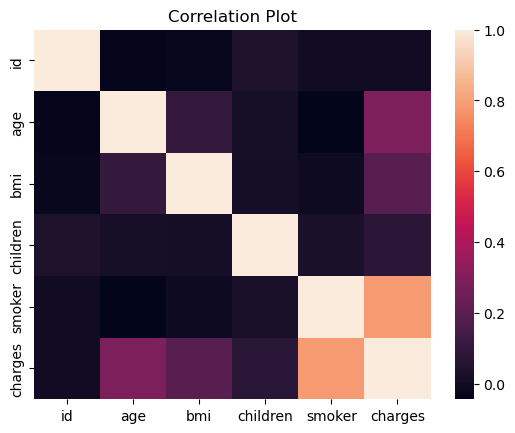

In [19]:
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
sns.heatmap(train.select_dtypes(exclude='object').corr()).set_title('Correlation Plot')
plt.show()

In [20]:
correlation_matrix = train.select_dtypes(exclude='object').corr()
print(correlation_matrix)

                id       age       bmi  children    smoker   charges
id        1.000000 -0.034313 -0.027494  0.034556  0.000900  0.001571
age      -0.034313  1.000000  0.100332  0.017404 -0.044012  0.286619
bmi      -0.027494  0.100332  1.000000  0.013049 -0.011151  0.193024
children  0.034556  0.017404  0.013049  1.000000  0.028259  0.073793
smoker    0.000900 -0.044012 -0.011151  0.028259  1.000000  0.784473
charges   0.001571  0.286619  0.193024  0.073793  0.784473  1.000000


Analysis of Correlation plot
*Charges and Smoker
    - There is a strong positive correlation (0.784) between charges and smoker status
    - This suggests that individuals who smoke tend to have higher medical charges compared to non-smokers
*Charges and Age
    - There is a moderate positive correlation (0.287) between charges and age
    - This indicates that as individuals get older their medical charges tend to increase
*Charges and BMI
    - There is a weak positive correlation (0.193) between charges and BMI (Body Mass Index)
    - This suggests that individuals with higher BMI may have slightly higher medical charges
*Charges and Children
    - There is a very weak positive correlation (0.074) between charges and the number of children
    - This indicates that there is a slight tendency for individuals with more children to have slightly higher medical charges
    
Overall, the strongest correlation is observed between charges and smoker status, suggesting that smoking behavior has a significant impact on medical charges making it a strong predictor. Age also shows a moderate positive correlation with charges, indicating that age plays a role in determining medical expenses. However, BMI and the number of children have weaker correlations with charges compared to smoker status and age.

Text(0.5, 1.0, 'Analysis of medical insurance plans based on smoker')

<Axes: title={'center': 'Analysis of medical insurance plans based on smoker'}, xlabel='smoker', ylabel='charges'>

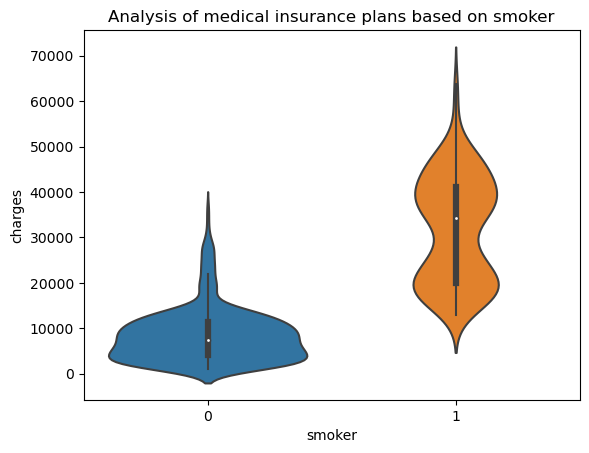

In [21]:
plt.title('Analysis of medical insurance plans based on smoker')
sns.violinplot(x='smoker', y='charges', data=train)
plt.show()

*Analysis of medical insurance plans based on smoker
   - The obtained violin plot displays the distribution of medical insurance plans based on smoker status
   - There are more plans available for non-smokers, as shown by the wider violin on the left
   - Smokers face higher median insurance prices, as indicated by the higher horizontal line in the right violin
   - The price distribution is broader for smokers, suggesting greater variation in plans compared to non-smokers
   - The plot provides an overview of trends, it does not establish causality between smoking and insurance prices

Text(0.5, 1.0, 'Analysis of medical insurance plans based on sex')

<Axes: title={'center': 'Analysis of medical insurance plans based on sex'}, xlabel='sex', ylabel='charges'>

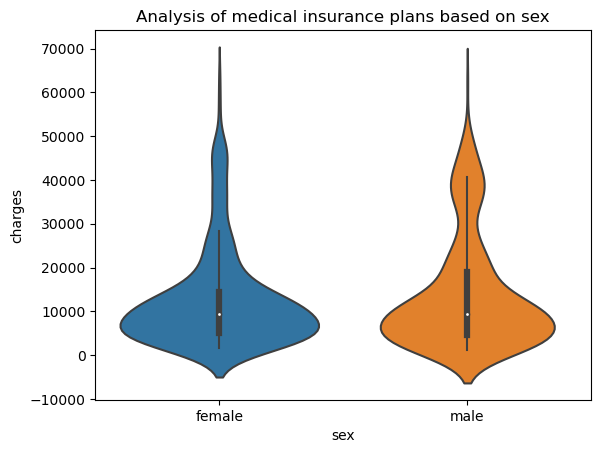

In [23]:
plt.title('Analysis of medical insurance plans based on sex')
sns.violinplot(x='sex', y='charges', data=train)
plt.show()

*Analysis of medical insurance plans based on sex
   - The distribution of charges is wider for females than for males
   - A wider spread of the violin on the left side of the plot compared to the violin on the right side is observed
   - This suggests that there is more variation in the charges for medical insurance plans for females than for males
   - The median charge of medical insurance plans is higher for females than for males
   - This is shown by the fact that the horizontal line in the violin on the left is higher than the horizontal line in the violin on the right


Text(0.5, 1.0, 'Analysis of medical insurance plans based on region')

<Axes: title={'center': 'Analysis of medical insurance plans based on region'}, xlabel='region', ylabel='charges'>

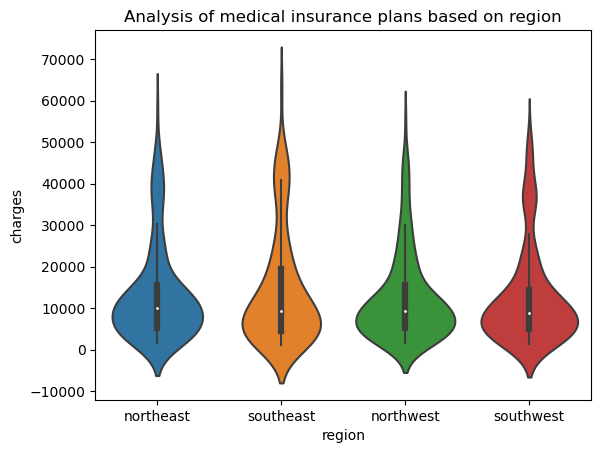

In [22]:
plt.title('Analysis of medical insurance plans based on region')
sns.violinplot(x='region', y='charges', data=train)
plt.show()

*Analysis of medical insurance plans based on region
   - The violin plot illustrates the distribution of changes in medical insurance plans by region (northeast, southeast, northwest, southwest)
   - All regions exhibit almost a similar distribution, as indicated by the consistent width and spread across the violins
   - The northeast and southwest regions demonstrate a wider range of changes, as evidenced by the extended tails
   - In contrast, the southeast and northwest regions have a more confined range
   - The median change in plots is positive across all regions, with horizontal lines situated above zero 
   - This plot provides a visual overview of data trends, it doesn't convey specific changes in plan numbers

In [28]:
from IPython.display import display
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Assuming 'train' is your DataFrame

# Select only numerical columns
numerical_columns = train.select_dtypes(include=np.number)

# Initialize MinMaxScaler
min_max_scaler = MinMaxScaler()

# Fit and transform the scaler on the numerical columns
X_train_minmax = min_max_scaler.fit_transform(numerical_columns)
# Display the transformed data
print(X_train_minmax)


[[9.12490651e-01 2.60869565e-01 1.63435281e-01 2.00000000e-01
  0.00000000e+00 5.74048308e-02]
 [2.96933433e-01 6.52173913e-02 4.11250683e-01 0.00000000e+00
  0.00000000e+00 2.46847258e-01]
 [1.10695587e-01 7.60869565e-01 5.86291644e-01 2.00000000e-01
  0.00000000e+00 1.57031889e-01]
 [8.45175767e-02 6.52173913e-02 5.39595849e-01 0.00000000e+00
  0.00000000e+00 2.04770871e-02]
 [7.62902019e-01 7.17391304e-01 5.74549427e-01 0.00000000e+00
  0.00000000e+00 1.22536253e-01]
 [4.54749439e-01 2.17391304e-01 3.00928454e-01 4.00000000e-01
  0.00000000e+00 5.28858223e-02]
 [1.34629768e-02 8.26086957e-01 6.64664118e-01 0.00000000e+00
  0.00000000e+00 1.51328490e-01]
 [9.60359013e-01 9.34782609e-01 5.55434189e-01 2.00000000e-01
  1.00000000e+00 7.38756173e-01]
 [5.93118923e-01 7.60869565e-01 1.34898962e-01 0.00000000e+00
  1.00000000e+00 3.20421507e-01]
 [7.67389678e-01 2.17391304e-02 2.74986346e-01 2.00000000e-01
  1.00000000e+00 2.44682755e-01]
 [2.35602094e-01 7.39130435e-01 4.72146368e-01 0.0

C:\Users\Amulya Reddy Datla\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


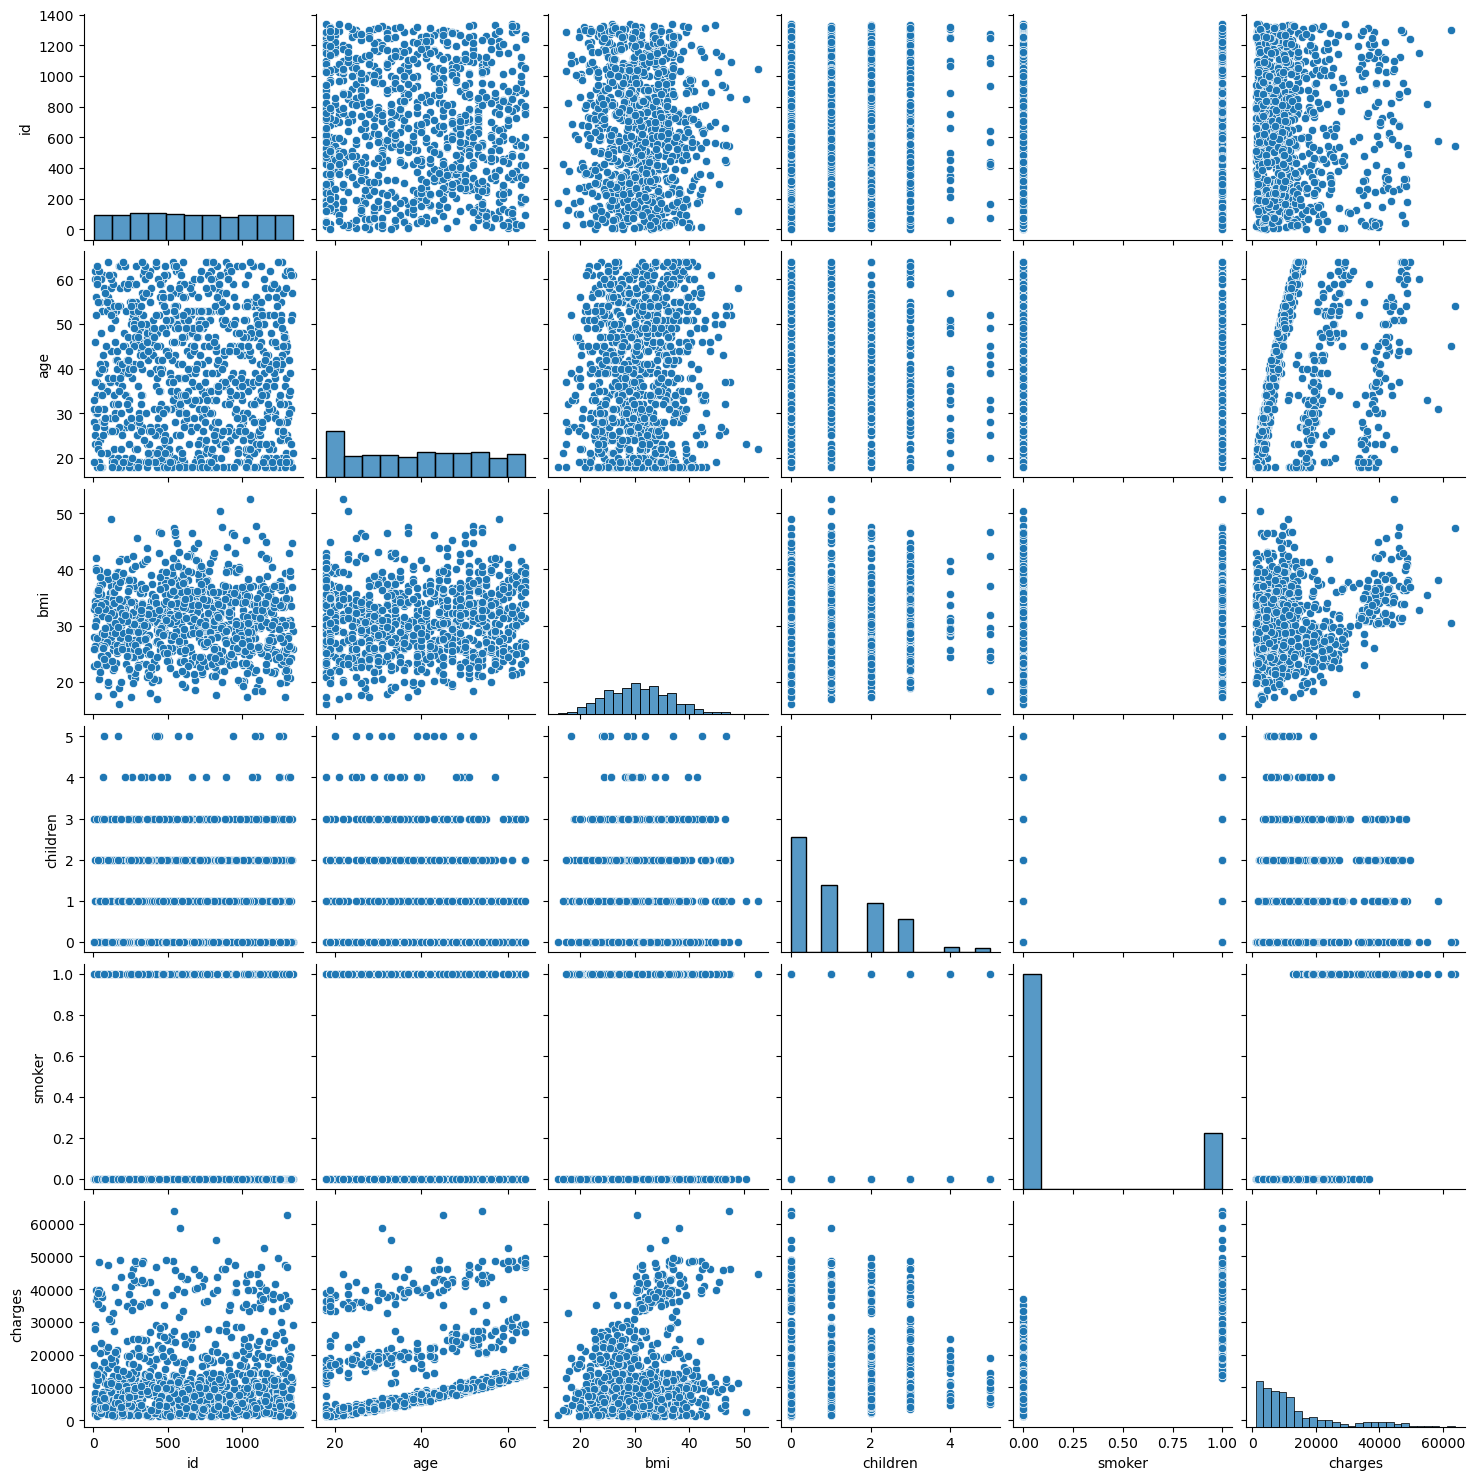

In [29]:
numerical_df = train.select_dtypes(include=['number'])

# Create scatter matrix for numerical columns
sns.pairplot(numerical_df)

plt.show()